In [7]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import pandas as pd
import numpy as np
import os

In [11]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [13]:
def createdataframe(dir):
    image_paths = []
    labels = []

    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir, label)):
            image_paths.append(os.path.join(dir, label, imagename))
            labels.append(label)
        print(label, "completed")
    
    return image_paths, labels


In [14]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [15]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [16]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [17]:
print(test)

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]


In [19]:
from tqdm.notebook import tqdm

In [20]:
def extract_features(images):
    features = []

    for image in tqdm(images):
        img = load_img(image, grayscale = True)
        img = np.array(img)
        features.append(img)
    
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)

    return features

In [51]:
image_paths = ["images/train/happy/28.jpg"]
features = extract_features(image_paths)

print("Shape of features:", features.shape)

print("Shape of a single input image:", features[0].shape)

  0%|          | 0/1 [00:00<?, ?it/s]

Shape of features: (1, 48, 48, 1)
Shape of a single input image: (48, 48, 1)


In [21]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [22]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [23]:
x_train = train_features/255.0
x_test = test_features/255.0

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()

In [26]:
le.fit(train['label'])

LabelEncoder()

In [27]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [28]:
y_train = to_categorical(y_train, num_classes = 7)
y_test = to_categorical(y_test, num_classes = 7)

In [30]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape = (48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(7, activation='softmax'))

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [33]:
model.fit(x = x_train, y = y_train, batch_size = 128, epochs = 50, validation_data = (x_test, y_test))

Epoch 1/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 326s 1s/step - accuracy: 0.2381 - loss: 1.8385 - val_accuracy: 0.2608 - val_loss: 1.7976
Epoch 2/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 310s 1s/step - accuracy: 0.2480 - loss: 1.8004 - val_accuracy: 0.2982 - val_loss: 1.6977
Epoch 3/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 308s 1s/step - accuracy: 0.3029 - loss: 1.7072 - val_accuracy: 0.3848 - val_loss: 1.5636
Epoch 4/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 313s 1s/step - accuracy: 0.3796 - loss: 1.5772 - val_accuracy: 0.4648 - val_loss: 1.4319
Epoch 5/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 310s 1s/step - accuracy: 0.4289 - loss: 1.4675 - val_accuracy: 0.4918 - val_loss: 1.3469
Epoch 6/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 424s 2s/step - accuracy: 0.4468 - loss: 1.4242 - val_accuracy: 0.5037 - val_loss: 1.3064
Epoch 7/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 322s 1s/step - accuracy: 0.4655 - loss: 1.3845 - val_accuracy: 0.5112 - val_loss: 1.2695
Epoch 8/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 317s 1s/step - accuracy: 0.4909 - loss: 1.3340 - val_accu

KeyboardInterrupt: 

In [35]:
model_json = model.to_json()
with open('emotiondetector.json', 'w') as json_file:
    json_file.write(model_json)

model.save('emotiondetector.h5')

In [57]:
label = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [52]:
def ef(image):
    img = load_img(image, color_mode='grayscale', target_size=(48, 48))
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [53]:
image_path = "images/train/happy/28.jpg"
img = ef(image_path)

print("Processed image shape:", img.shape)

Processed image shape: (1, 48, 48, 1)


In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

Original image is surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Emotion predicted by the model :  surprise


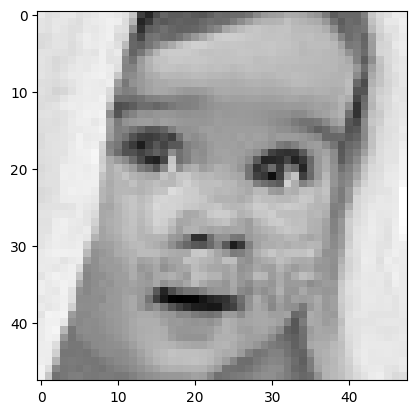

In [65]:
image = 'images/train/surprise/52.jpg'
label_from_path = image.split('/')[-2]
print(f"Original image is {label_from_path}")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Emotion predicted by the model : ", pred_label)

plt.imshow(img.reshape(48,48), cmap = 'gray')

Original image is angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Emotion predicted by the model :  neutral


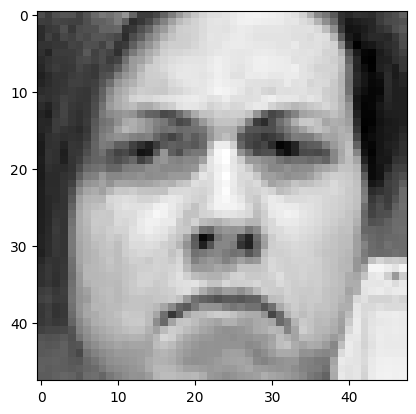

In [66]:

image = 'images/train/angry/40.jpg'
label_from_path = image.split('/')[-2]
print(f"Original image is {label_from_path}")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Emotion predicted by the model : ", pred_label)

plt.imshow(img.reshape(48,48), cmap = 'gray')

Original image is fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
Emotion predicted by the model :  fear


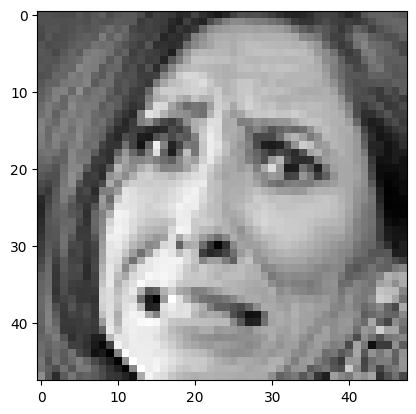

In [72]:
image = 'images/train/fear/1253.jpg'
label_from_path = image.split('/')[-2]
print(f"Original image is {label_from_path}")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Emotion predicted by the model : ", pred_label)

plt.imshow(img.reshape(48,48), cmap = 'gray')